DAY 2:DIY 
Task/AssignmentCreate i-python notebook file with detailed markdown and complete the following tasks:
- Research about the recent cases of COVID-19 in India and Iran
- Read news every day, collect the data and update the dataset till next week 
- Find the total number of COVID-19 cases in India till date
- Which state is the most recent with COVID-19 case?
- What is the total number of active COVID-19 cases in India?
- Create multiple visualization and compare thespread of COVID-19 in India with Iran
- Use Prophet to forecast the data for next 10 days with 97% confidence interval
- Write down your inference after plotting the visualization. Tell us if trend of COVID-19 in India is similar to Iran.
- Write down a theory to justify your inference.

In [1]:
#@title
# importing the required libraries
#cleaning data library
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#@title
# Boilerplate to run browser automation tool selenium on colab
# We need to install selenium and update ubuntu so that we can install chromium-chromedriver
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
# Web automation tool in selenium to run tests against different browsers. Here, we will use this to fetch website
# The chrome options tell the web driver that we want to run browser:
# - Without GUI i.e. headless
# - Just want to fetch webpage so we don't need sandbox mode
# To avoid crashes due to shared memory issues we use disable-dev-shm-usage
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 2.9MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ P

In [5]:
#@title various data cleaning to get a proper table for covid19 in india , same as the main project 
# for date and time opeations
from datetime import datetime
import time
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for scraping web contents
from bs4 import BeautifulSoup

# setup webdriver
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# get web data
#using chromium and selenium driver , the source page HTML code of the given website is downloaded here 
wd.get('https://www.mohfw.gov.in/')
time.sleep(10)

# parse web data
#for understanding data from HTML code
soup = BeautifulSoup(wd.page_source)

# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.table.tbody
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

head_rows[2][0]=head_rows[2][0]+' '+head_rows[1][2]
head_rows[2][1]=head_rows[1][2]+head_rows[2][1][6:22]
head_rows[2][2]=head_rows[2][2]+' '+head_rows[1][3]
head_rows[2][3]=head_rows[1][3]+head_rows[2][3][6:]
head_rows[2][4]=head_rows[2][4]+' '+head_rows[1][4]
head_rows[2][5]=head_rows[1][4]+head_rows[2][5][6:]

cols=head_rows[1][:2]+head_rows[2]

# save contents in a dataframe
# ============================
import pandas as pd    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-5], columns=cols)

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Cumulative Deaths**'] = df_India['Cumulative Deaths**'].str.replace('#', '')

# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

# remove cummulative columns
df_India=df_India.drop(['Active Cases* since yesterday',
                        'Cured/Discharged/Migrated* since yesterday',
                        'Deaths** since yesterday'],axis=1)

# rename columns
df_India = df_India.rename(columns={  'Name of State / UT':'State/UnionTerritory',
                                      'Cumulative Cured/Discharged/Migrated*': 'Cured', 
                                      'Total Active Cases*': 'Confirmed', 
                                      'Cumulative Deaths**':'Deaths'
                                      })

# rearrange columns
df_India=pd.DataFrame(df_India,columns=['Date','Latitude', 'Longitude',
                                        'State/UnionTerritory', 'Confirmed', 'Cured','Deaths'])

# Fill empty death entries with 0
df_India.Deaths.replace(u'\xa0 ',u'0',inplace=True)

# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])


# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)
%ls
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'
df= pd.read_csv(file_name)
df_india = df.copy()
df


'2020_10_14 - COVID-19_India.csv'                sample_data/
'2020_10_14 - COVID-19_India_preprocessed.csv'


,Date,Latitude,Longitude,State/UnionTerritory,Confirmed,Cured,Deaths
0,2020-10-14,11.7401,92.6586,Andaman and Nicobar Islands,199,3782,55
1,2020-10-14,15.9129,79.7400,Andhra Pradesh,42855,714427,6291
2,2020-10-14,28.2180,94.7278,Arunachal Pradesh,2960,9573,28
3,2020-10-14,26.2006,92.9376,Assam,28897,167059,830
4,2020-10-14,25.0961,85.3131,Bihar,10835,187059,961
5,2020-10-14,30.7333,76.7794,Chandigarh,1127,12007,197
6,2020-10-14,21.2787,81.8661,Chhattisgarh,27208,119352,1306
7,2020-10-14,NaN,NaN,Dadra and Nagar Haveli and Daman and Diu,85,3081,2
8,2020-10-14,28.7041,77.1025,Delhi,21490,286880,5854
9,2020-10-14,15.2993,74.1240,Goa,4316,34252,514


In [6]:
#total number of COVID-19 cases in India till date
total_cases = df['Confirmed'].sum()
print('Total number of COVID 2019 cases registered across India till date:', total_cases)

Total number of active COVID 2019 cases across India till date: 826876


In [ ]:
#Which state is the most recent with COVID-19 case

I am unable to understand the question very well . As any two or more states can diagonise covid cases within thier states at the same time as any other state, I don't understand how to determine a state which as the most recent covid 19 case

In [23]:
#What is the total number of active COVID-19 cases in India?
a=df['Cured']+df['Deaths']
total_active_cases = (a-df['Confirmed']).sum()
print('Total number of active COVID 2019 cases across India till date are:', total_active_cases)

Total number of active COVID 2019 cases across India till date are: 5585637


In [36]:
#Create multiple visualization and compare the spread of COVID-19 in India with Iran
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
iran_confirmed=confirmed_df.loc[confirmed_df['Country/Region']=='Iran']
india_confirmed=confirmed_df.loc[confirmed_df['Country/Region']=='India']
total_iran_confirmed = iran_confirmed[iran_confirmed.columns[-1:]].sum()
total_india_confirmed = india_confirmed[india_confirmed.columns[-1:]].sum()
print(total_iran_confirmed)
print(total_india_confirmed)

10/13/20    508389
dtype: int64
10/13/20    7239389
dtype: int64


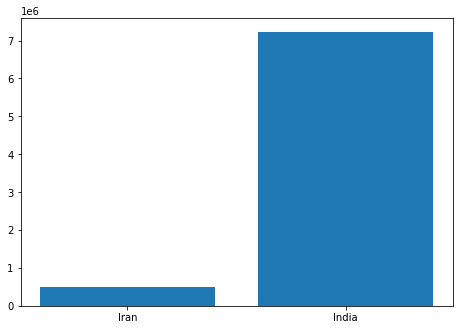

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
country = ['Iran','India']
counts = [508389,7239389]
ax.bar(country,counts)
plt.show()

In [41]:
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
iran_recovered=recovered_df.loc[recovered_df['Country/Region']=='Iran']
india_recovered=recovered_df.loc[recovered_df['Country/Region']=='India']
total_iran_recovered = iran_recovered[iran_confirmed.columns[-1:]].sum()
total_india_recovered = india_recovered[india_confirmed.columns[-1:]].sum()
print(total_iran_recovered)
print(total_india_recovered)

10/13/20    411840
dtype: int64
10/13/20    6301927
dtype: int64


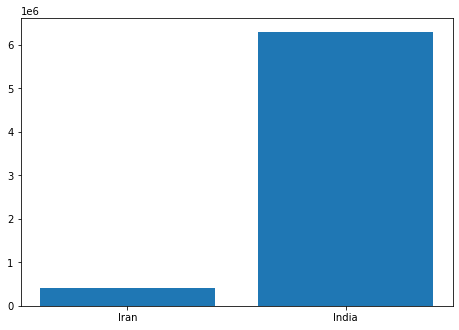

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
country = ['Iran','India']
counts = [411840,6301927]
ax.bar(country,counts)
plt.show()

In [43]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
iran_deaths=deaths_df.loc[deaths_df['Country/Region']=='Iran']
india_deaths=deaths_df.loc[deaths_df['Country/Region']=='India']
total_iran_deaths = iran_deaths[iran_confirmed.columns[-1:]].sum()
total_india_deaths = india_deaths[india_confirmed.columns[-1:]].sum()
print(total_iran_deaths)
print(total_india_deaths)

10/13/20    29070
dtype: int64
10/13/20    110586
dtype: int64


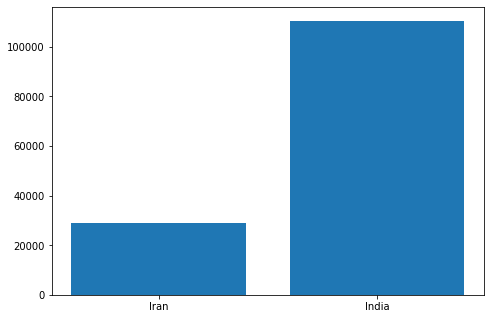

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
country = ['Iran','India']
counts = [29070,110586]
ax.bar(country,counts)
plt.show()

- Write down your inference after plotting the visualization. Tell us if trend of COVID-19 in India is similar to Iran.
- Write down a theory to justify your inference.


---
Answers:
- there seems to be very less/ no similarity between the trends of Iran and India , but I have just analysed the counts of deaths , reovery and total confirmed cases which is not sufficient enough to make a good analysis , but as per my understanding of information that I checked over wikipedia ( they made a dashboard ) and these huge variations in counts , I have come to above conclusion
- the data to be used wasn't specifically mentioned so I just used the github links of worldwide data as was provided in the workshop . Now this data has very less information on Iran( like testinng rates, state wise data, testing centres, medical infrastructure etc which was available for India ) which meant very less comparitive study and in turn, it was hard to tell if there were actually any trends or not 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


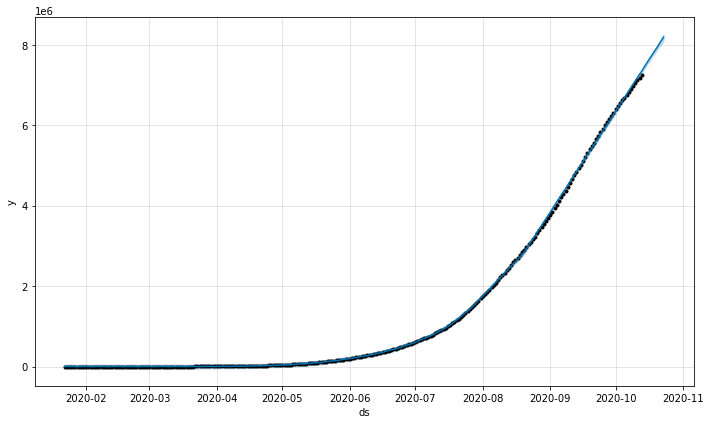

In [52]:
#Use Prophet to forecast the data for next 10 days with 97% confidence interval
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0]


!pip install Prophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed
confirmed = data.copy()
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
prop = Prophet(interval_width=0.97)
prop.fit(data)
future = prop.make_future_dataframe(periods=10)
#future.tail(15)
forecast = prop.predict(future)
confirmed_forecast_plot = prop.plot(forecast)